In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collecting

In [2]:
all_df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/2-Faza-Grace/refs/heads/master/Data%20fix/ispu_dki_all.csv')
all_df.head(5)

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,NaN,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,NaN,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,NaN,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,NaN,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,NaN,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


# Data Cleaning

In [3]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4626 non-null   object 
 1   stasiun   4626 non-null   object 
 2   pm10      4466 non-null   float64
 3   pm25      723 non-null    float64
 4   so2       4607 non-null   float64
 5   co        4618 non-null   float64
 6   o3        4621 non-null   float64
 7   no2       4618 non-null   float64
 8   max       4626 non-null   float64
 9   critical  4625 non-null   object 
 10  categori  4626 non-null   object 
dtypes: float64(7), object(4)
memory usage: 397.7+ KB


In [4]:
all_df['tanggal'] = pd.to_datetime(all_df['tanggal'])

In [5]:
missing_values = all_df.isna().sum()
missing_values[missing_values > 0]

pm10         160
pm25        3903
so2           19
co             8
o3             5
no2            8
critical       1
dtype: int64

Text(0.5, 1.0, 'Feature Correlation')

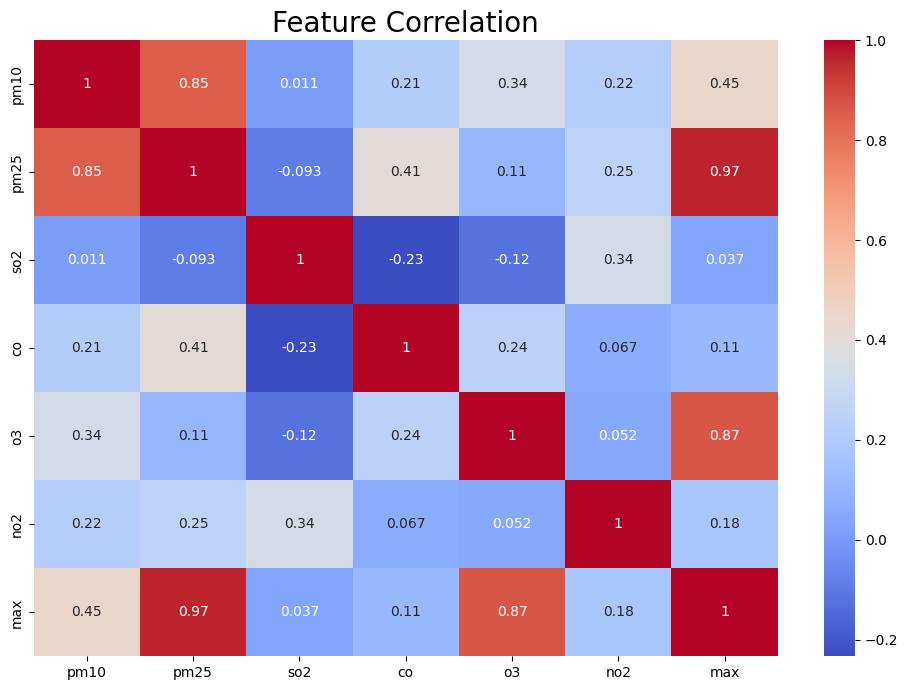

In [6]:
numeric_features = all_df.select_dtypes(include='number').columns
plt.figure(figsize=(12,8))
sns.heatmap(all_df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation', fontsize=20)

In [7]:
all_df['pm10'] = all_df['pm10'].fillna(all_df['pm10'].median())

In [8]:
all_df['so2'] = all_df['so2'].fillna(all_df['so2'].median())

In [9]:
all_df['co'] = all_df['co'].fillna(all_df['co'].median())

In [10]:
all_df['o3'] = all_df['o3'].fillna(all_df['o3'].median())

In [11]:
all_df['no2'] = all_df['no2'].fillna(all_df['no2'].median())

In [12]:
all_df = all_df[all_df['categori'] != 'TIDAK ADA DATA']

In [13]:
print(f'Data yang memiliki duplikat: {all_df.duplicated().sum()}')

Data yang memiliki duplikat: 0


In [14]:
all_df["critical"] = all_df[["pm10", "so2", "co", "o3", "no2"]].idxmax(axis=1)

In [15]:
all_df.drop(columns='pm25', inplace=True)

In [16]:
all_df.describe(include='all')

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
count,4625,4625,4625.000000,4625.000000,4625.000000,4625.000000,4625.000000,4625.000000,4625,4625
unique,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,5,5
top,NaN,DKI4 (Lubang Buaya),NaN,NaN,NaN,NaN,NaN,NaN,o3,SEDANG
freq,NaN,1592,NaN,NaN,NaN,NaN,NaN,NaN,2925,2574
mean,2016-06-23 07:15:53.513513728,NaN,65.049514,28.179243,30.261622,86.579243,18.119135,99.453622,NaN,NaN
min,2010-01-01 00:00:00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,NaN,NaN
25%,2013-03-05 00:00:00,NaN,54.000000,18.000000,21.000000,51.000000,13.000000,70.000000,NaN,NaN
50%,2016-05-04 00:00:00,NaN,64.000000,27.000000,29.000000,78.000000,17.000000,91.000000,NaN,NaN
75%,2019-07-23 00:00:00,NaN,75.000000,34.000000,37.000000,110.000000,21.000000,118.000000,NaN,NaN
max,2023-11-30 00:00:00,NaN,179.000000,126.000000,134.000000,314.000000,134.000000,314.000000,NaN,NaN


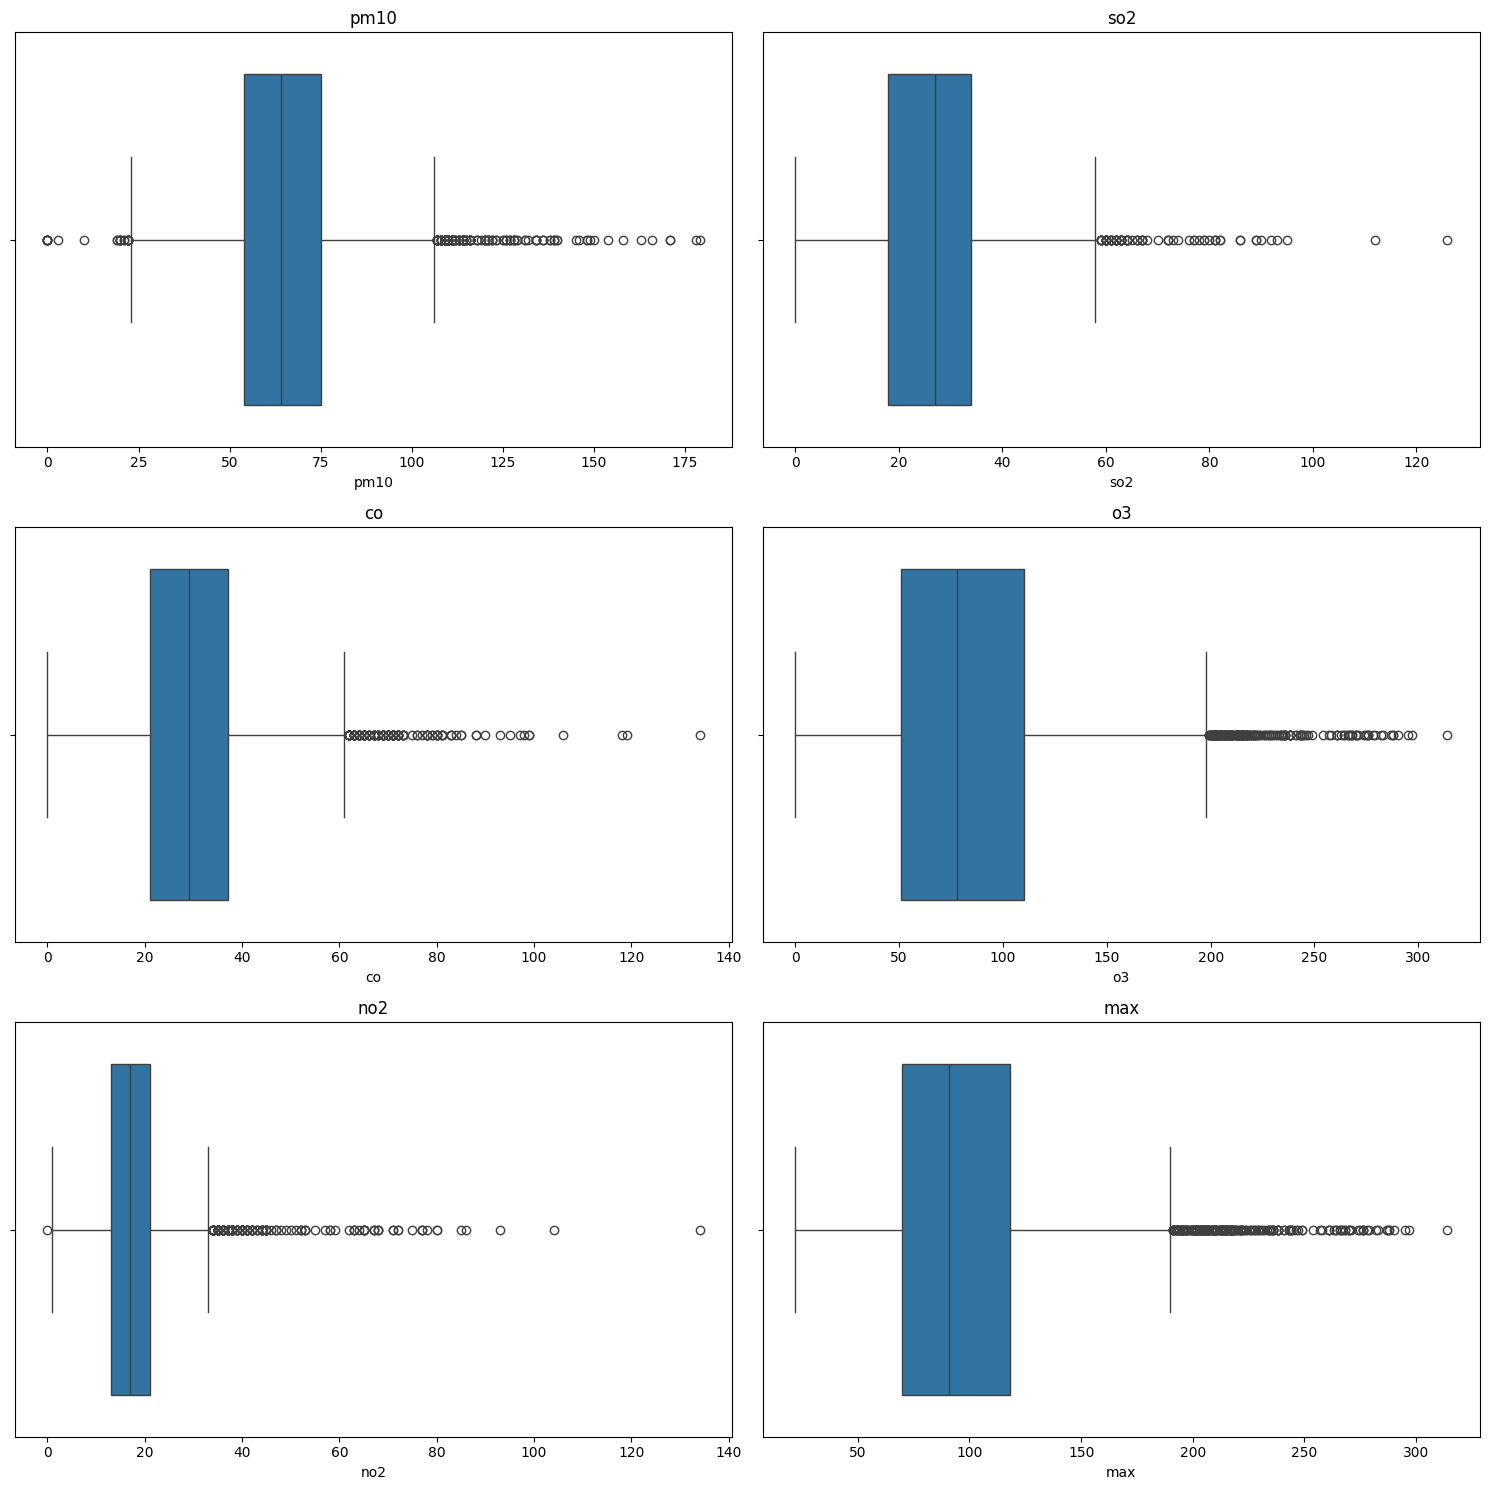

In [17]:
numeric_features = all_df.select_dtypes(include='number').columns

total_features = len(numeric_features)
n_cols = 2
n_rows = -(-total_features // n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(x=all_df[feature], ax=axes[i])
    axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [18]:
all_df['categori'].value_counts()

categori
SEDANG                2574
TIDAK SEHAT           1568
BAIK                   280
SANGAT TIDAK SEHAT     202
BERBAHAYA                1
Name: count, dtype: int64

# Visualisasi Data

## Distribusi Polutan

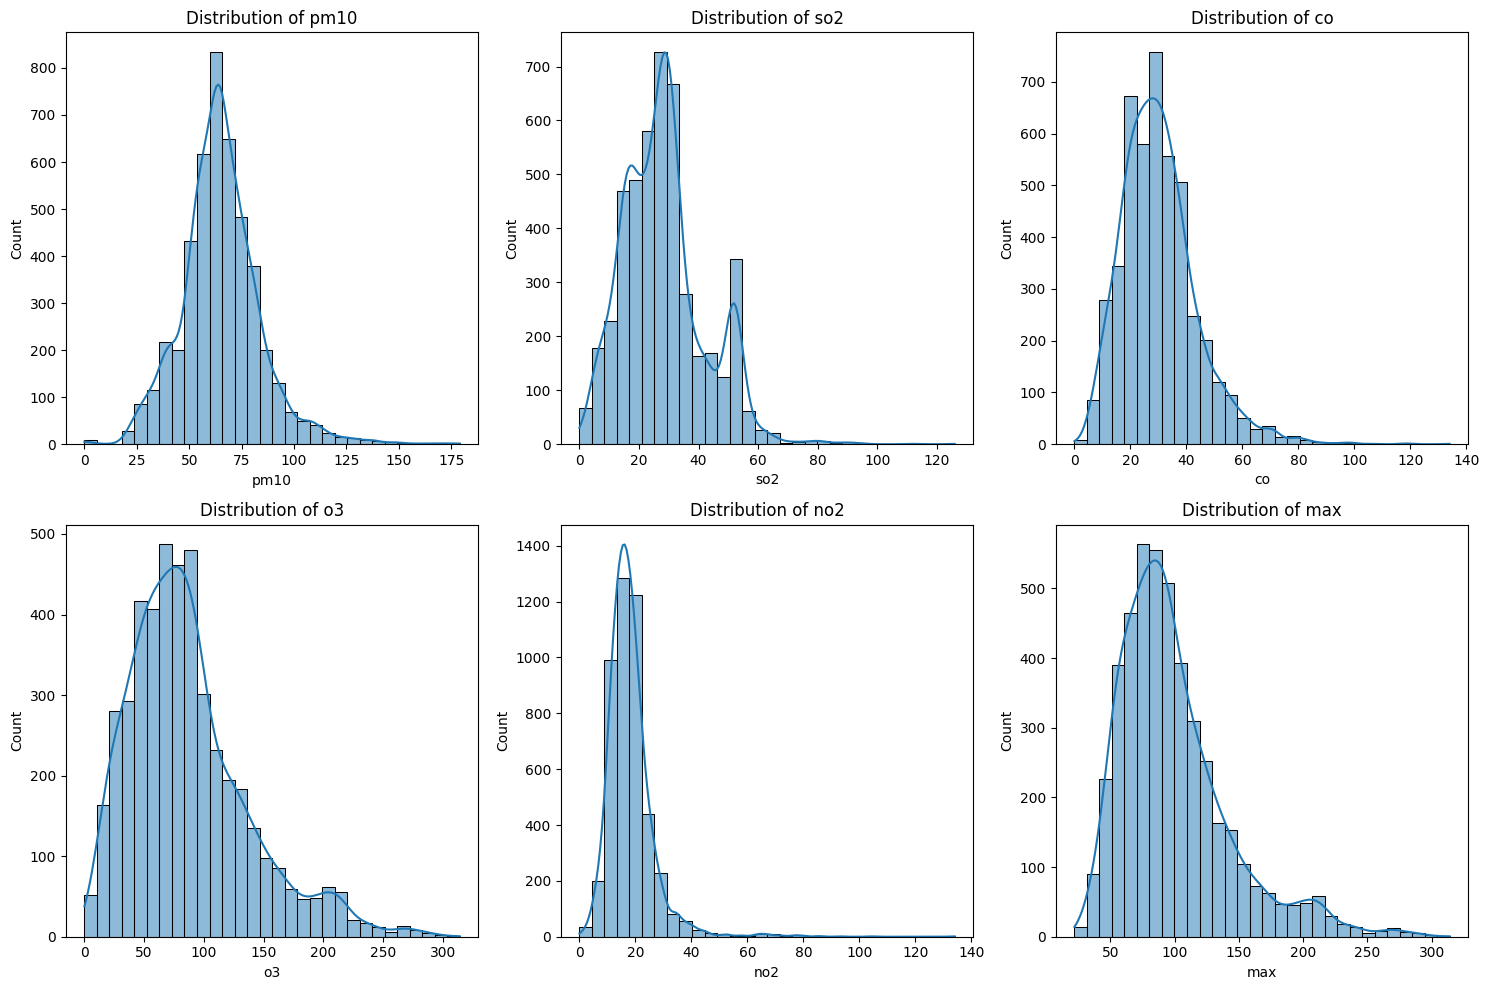

In [19]:
plt.figure(figsize=(15,10))
for i, column, in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(all_df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

# Distribusi Polutan di setiap stasiun

In [20]:
stasiun_trend = all_df.groupby(by='stasiun').agg({
    'pm10' : 'mean',
    'so2' : 'mean',
    'co' : 'mean',
    'o3' : 'mean',
    'no2': 'mean',
})

stasiun_trend

,pm10,so2,co,o3,no2
stasiun,,,,,
DKI1 (Bunderan HI),57.545817,17.665339,33.838645,51.996016,17.884462
DKI2 (Kelapa Gading),59.986541,28.092867,30.581427,99.776581,18.948856
DKI3 (Jagakarsa),64.370652,30.440217,30.550000,85.588043,17.392391
DKI4 (Lubang Buaya),69.586055,30.150126,28.581658,80.415201,18.778266
DKI5 (Kebon Jeruk),66.122120,28.322581,30.694700,107.639401,17.105991


In [ ]:
Average_

### 1. bagaimana Trend Polutan setiap tahunnya?

In [21]:
air_trends_df = all_df.resample(rule='YE', on='tanggal').agg({
    'pm10' : 'mean',
    'so2' : 'mean',
    'co' : 'mean',
    'o3' : 'mean',
    'no2': 'mean',
})

air_trends_df.index = air_trends_df.index.strftime('%Y')
air_trends_df = air_trends_df.reset_index()

air_trends_df.rename(columns={
    'tanggal' : 'tahun'
}, inplace=True)

air_trends_df

,tahun,pm10,so2,co,o3,no2
0,2010,52.563536,13.209945,35.552486,50.334254,18.116022
1,2011,76.704110,17.468493,29.813699,89.161644,17.663014
2,2012,78.243169,25.352459,37.071038,152.218579,18.658470
3,2013,66.202740,20.849315,36.008219,116.120548,18.178082
4,2014,67.347945,14.164384,33.849315,90.246575,18.449315
5,2015,71.150685,23.715068,33.493151,73.336986,18.720548
6,2016,63.071038,30.803279,43.551913,82.751366,15.215847
7,2017,59.128767,43.931507,36.046575,83.923288,15.134247
8,2018,62.665753,30.860274,24.158904,118.942466,15.863014
9,2019,65.579710,27.886957,24.886957,111.944928,15.304348


In [22]:
#visualisasi


###  2. Kapan periode Terburuk dan Terbaik untuk Beraktivitas di Luar Ruangan di Jakarta?

In [41]:
average_max= all_df['max'].mean()

In [42]:
all_df['bulan'] = all_df['tanggal'].dt.month
air_monthly = all_df.groupby('bulan')['max'].mean()

air_monthly

bulan
1      74.056511
2      82.512262
3      96.751244
4      97.269720
5     102.111111
6     100.494872
7     103.615196
8     104.450980
9     109.384401
10    119.193029
11    115.732591
12     90.193548
Name: max, dtype: float64

In [24]:
#Visualisasi

### 3. Apakah Ganjil-Genap Berhasil Mengurangi Polusi Udara di Jakarta?

In [43]:
air_trends_df = all_df.resample(rule='YE', on='tanggal').agg({
    'pm10' : 'mean',
    'so2' : 'mean',
    'co' : 'mean',
    'o3' : 'mean',
    'no2': 'mean',
})

air_trends_df.index = air_trends_df.index.strftime('%Y')
air_trends_df = air_trends_df.reset_index()

air_trends_df.rename(columns={
    'tanggal' : 'tahun'
}, inplace=True)

air_trends_df

,tahun,pm10,so2,co,o3,no2
0,2010,52.563536,13.209945,35.552486,50.334254,18.116022
1,2011,76.704110,17.468493,29.813699,89.161644,17.663014
2,2012,78.243169,25.352459,37.071038,152.218579,18.658470
3,2013,66.202740,20.849315,36.008219,116.120548,18.178082
4,2014,67.347945,14.164384,33.849315,90.246575,18.449315
5,2015,71.150685,23.715068,33.493151,73.336986,18.720548
6,2016,63.071038,30.803279,43.551913,82.751366,15.215847
7,2017,59.128767,43.931507,36.046575,83.923288,15.134247
8,2018,62.665753,30.860274,24.158904,118.942466,15.863014
9,2019,65.579710,27.886957,24.886957,111.944928,15.304348


In [26]:
#visualisasi

### 4. Apakah Perayaan Hari Besar Seperti Tahun Baru dan Lebaran Mempengaruhi Kualitas Udara?


In [27]:
event_dates = {'Tahun Baru': ['2018-01-01', '2019-01-01', '2020-01-01'],
               'Lebaran': ['2018-06-15', '2019-06-05', '2020-05-24']}
for event, dates in event_dates.items():
    event_df = all_df[all_df['tanggal'].isin(pd.to_datetime(dates))]
    print(f"Rata-rata ISPU pada {event}: {event_df['max'].mean()}")

Rata-rata ISPU pada Tahun Baru: 64.33333333333333
Rata-rata ISPU pada Lebaran: 102.66666666666667


In [28]:
# Visualisasi

### 5. Apakah Udara Jakarta Lebih Bersih di Akhir Pekan Dibandingkan Hari Kerja?

In [29]:
all_df['hari'] = all_df['tanggal'].dt.dayofweek
all_df['kategori_hari'] = all_df['hari'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
weekend_vs_weekday = all_df.groupby('kategori_hari')['max'].mean()
weekend_vs_weekday

kategori_hari
Weekday    99.643786
Weekend    98.976480
Name: max, dtype: float64

In [30]:
# Visualisasi

### 6. Bagaimana pengaruh COVID-19 terhadap kualitas Udara di Jakarta


In [31]:
all_df['tahun'] = all_df['tanggal'].dt.year
covid_years = all_df[all_df['tahun'].isin([2019, 2020, 2021])]
covid_trend = covid_years.groupby('tahun')['max'].mean()
covid_trend

tahun
2019    112.353623
2020     88.049383
2021     94.030137
Name: max, dtype: float64

In [32]:
# Visualisasi

### 7. Apakah Kualitas Udara Berbeda antara Wilayah Pusat dan Pinggiran Jakarta?


In [33]:
stasiun_group = all_df.groupby('stasiun')['max'].mean().sort_values()
stasiun_group

stasiun
DKI1 (Bunderan HI)       66.314741
DKI3 (Jagakarsa)         91.284783
DKI2 (Kelapa Gading)    103.807537
DKI4 (Lubang Buaya)     106.521357
DKI5 (Kebon Jeruk)      110.587558
Name: max, dtype: float64

In [34]:
# Visualisasi

### 8. Apa Faktor Utama yang Menyebabkan Kualitas Udara Buruk di Jakarta?


In [35]:
pollutants = ['pm10', 'so2', 'co', 'o3', 'no2']
pollutants_impact = all_df[pollutants].corrwith(all_df['max'])
pollutants_impact

pm10    0.446665
so2     0.037016
co      0.114005
o3      0.866697
no2     0.175396
dtype: float64

In [36]:
# Visualisasi

### 9. Apakah Polusi Udara Lebih Tinggi di Kawasan Industri?

In [37]:
industrial_stations = ['DKI5 (Kebon Jeruk)', 'DKI4 (Lubang Buaya)']
all_df['kategori wilayah'] =  all_df['stasiun'].apply(lambda x: 'Industrial' if x in industrial_stations else 'Bukan Kawasan Industri')
industrial_vs_other = all_df.groupby(by='kategori wilayah')['max'].mean().sort_values()
industrial_vs_other

kategori wilayah
Bukan Kawasan Industri     89.792610
Industrial                107.956098
Name: max, dtype: float64

In [38]:
# Visualisasi

In [39]:
all_df.head(5)

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,bulan,hari,kategori_hari,tahun,kategori wilayah
0,2010-01-01,DKI1 (Bunderan HI),60.0,4.0,73.0,27.0,14.0,73.0,co,SEDANG,1,4,Weekday,2010,Bukan Kawasan Industri
1,2010-01-02,DKI1 (Bunderan HI),32.0,2.0,16.0,33.0,9.0,33.0,o3,BAIK,1,5,Weekend,2010,Bukan Kawasan Industri
2,2010-01-03,DKI1 (Bunderan HI),27.0,2.0,19.0,20.0,9.0,27.0,pm10,BAIK,1,6,Weekend,2010,Bukan Kawasan Industri
3,2010-01-04,DKI1 (Bunderan HI),22.0,2.0,16.0,15.0,6.0,22.0,pm10,BAIK,1,0,Weekday,2010,Bukan Kawasan Industri
4,2010-01-05,DKI1 (Bunderan HI),25.0,2.0,17.0,15.0,8.0,25.0,pm10,BAIK,1,1,Weekday,2010,Bukan Kawasan Industri


In [44]:
all_df.to_csv("Data_Ispu_Jkt1", index=False)